<a href="https://colab.research.google.com/github/swimbeginner/TensorFlow2/blob/main/TrainingValidataionTesitngSplit_12192020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validation Sets and Test Sets (Colab training lecture)

predict California housing price
training, validation and testing split

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt


In [2]:
pd.options.display.max_rows=10
pd.options.display.float_format="{:.1f}".format

In [21]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [22]:
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111.4
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103.6
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85.8


In [23]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [24]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()

  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Epoch 1/30
136/136 [==============================] - 1s 2ms/step - loss: 49003.5964 - root_mean_squared_error: 221.1947 - val_loss: 30561.0801 - val_root_mean_squared_error: 174.8173
Epoch 2/30
136/136 [==============================] - 0s 1ms/step - loss: 24955.8034 - root_mean_squared_error: 157.8562 - val_loss: 14147.4355 - val_root_mean_squared_error: 118.9430
Epoch 3/30
136/136 [==============================] - 0s 1ms/step - loss: 11853.9165 - root_mean_squared_error: 108.6785 - val_loss: 7226.1543 - val_root_mean_squared_error: 85.0068
Epoch 4/30
136/136 [==============================] - 0s 1ms/step - loss: 7084.1899 - root_mean_squared_error: 84.1613 - val_loss: 6713.0122 - val_root_mean_squared_error: 81.9330
Epoch 5/30
136/136 [==============================] - 0s 1ms/step - loss: 7361.3636 - root_mean_squared_error: 85.7735 - val_loss: 6715.2324 - val_root_mean_squared_error: 81.9465
Epoch 6/30
136/136 [==============================] - 0s 1ms/step - loss: 7191.7079 - root

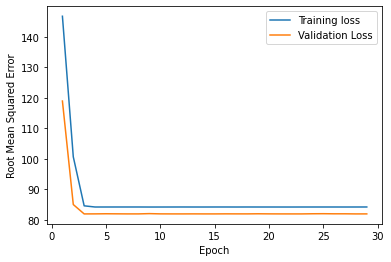

In [28]:
learning_rate=0.1
epochs=30
batch_size=100
# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.2

# Identify the feature and the label.
my_feature="median_income"  # the median income on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index)) 

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [16]:
train_df.head(n=100)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,0.0669
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,0.0801
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,0.0857
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,0.0734
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,0.0655
...,...,...,...,...,...,...,...,...,...
95,-115.58,32.81,5.0,805.0,143.0,458.0,143.0,4.4750,0.0963
96,-115.58,32.81,10.0,1088.0,203.0,533.0,201.0,3.6597,0.0875
97,-115.58,32.79,14.0,1687.0,507.0,762.0,451.0,1.6635,0.0644
98,-115.58,32.78,5.0,2494.0,414.0,1416.0,421.0,5.7843,0.1101


In [15]:
train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,0.207301
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,0.115984
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.014999
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,0.119400
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,0.180400
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,0.265000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,0.500001


In [27]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 983us/step - loss: 7119.7515 - root_mean_squared_error: 84.3786
